# Student Performance on the basis of Habit


### Life Cycle of machine learning 
* Understanding the problem statment
* Data Collection
* Data Check to perform 
* Exploratory data analysis
* Data Pre-Processing
* Model Training
* Choose best model


## 1. Problem Statment
* This Project understand and study the habit of student and predict with outmost accuracy how the student's performance (test score)

## 2. Data Collection
* Dataset Source: https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance/data
* Data consist of 16 columns including test score and 1000 rows

## 2.1. Import Data  and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warning Library

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


#### Import the CSV Data as Pandas DataFrame

In [5]:
df = pd.read_csv('student_habits_performance.csv')


In [6]:
df.head(5)


student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23  Female                  0.0                 1.2   
1      S1001   20  Female                  6.9                 2.8   
2      S1002   21    Male                  1.4                 3.1   
3      S1003   23  Female                  1.0                 3.9   
4      S1004   19  Female                  5.0                 4.4   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0            1.1            No                   85.0          8.0   
1            2.3            No                   97.3          4.6   
2            1.3            No                   94.8          8.0   
3            1.0            No                   71.0          9.2   
4            0.5            No                   90.9          4.9   

  diet_quality  exercise_frequency parental_education_level internet_quality  \
0         Fair                   6                   Master          Average   
1         Good                   6              High School          Average   
2         Poor                   1              High School             Poor   
3         Poor                   4                   Master             Good   
4         Fair                   3                   Master             Good   

   mental_health_rating extracurricular_participation  exam_score  
0                     8                           Yes        56.2  
1                     8                            No       100.0  
2                     1                            No        34.3  
3                     1                           Yes        26.8  
4                     1                            No        66.4

#### Shape of the Dataset

In [7]:
df.shape


(1000, 16)

## 2.2 DataSet Information
- gender : sex of students  -> (Male/female)
- Study hours per day: ranging from (0.0 - 8.30)
- Social Media usage in hrs: ranging from (0.0 - 7.2)
- Netflix hrs: ranging from  (0.0 - 5.4)
- Part time job : boolen 
- attendance_percentage
- sleep_hours
..... and many more

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [8]:

df.isna().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

There are 91 missing value in parental education level 

In [9]:
df.parental_education_level.unique()

array(['Master', 'High School', 'Bachelor', nan], dtype=object)

In [10]:
df.parental_education_level.isna().sum()

np.int64(91)

Now we have options:
1. Replace with mode (most frequent value)  
2. Drop the row 91 which is 9.1% of data set which is > than 5% (benchmark for droping nan data)
3. Impute with new category unknown (we are going with this)

In [11]:
# Replace NaN values with 'unknown'
df['parental_education_level'].fillna('unknown', inplace = True)

In [12]:
# verify
print(df.parental_education_level.value_counts())

print(df.parental_education_level.isna().sum())

parental_education_level
High School    392
Bachelor       350
Master         167
unknown         91
Name: count, dtype: int64
0


### 3.2 Check Duplicates

In [13]:
df.duplicated().sum()

np.int64(0)

There is no duplicate values in dataset

### 3.3 Check data types

In [14]:
# check null and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       1000 non-null   object 
 12  internet_quality               1000 non-null   ob

### 3.4 Checking the number of unique values of each column

In [15]:
df.nunique()

student_id                       1000
age                                 8
gender                              3
study_hours_per_day                78
social_media_hours                 60
netflix_hours                      51
part_time_job                       2
attendance_percentage             320
sleep_hours                        68
diet_quality                        3
exercise_frequency                  7
parental_education_level            4
internet_quality                    3
mental_health_rating               10
extracurricular_participation       2
exam_score                        480
dtype: int64

In [16]:
# I can drop student_id which is unique index value
df.drop(columns=['student_id'], inplace= True)

In [17]:
df.nunique()

age                                8
gender                             3
study_hours_per_day               78
social_media_hours                60
netflix_hours                     51
part_time_job                      2
attendance_percentage            320
sleep_hours                       68
diet_quality                       3
exercise_frequency                 7
parental_education_level           4
internet_quality                   3
mental_health_rating              10
extracurricular_participation      2
exam_score                       480
dtype: int64

In [18]:
df.gender.unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [19]:
df.diet_quality.unique()

array(['Fair', 'Good', 'Poor'], dtype=object)

### 3.5 Check statistics of data set

In [20]:
df.describe()

age  study_hours_per_day  social_media_hours  netflix_hours  \
count  1000.0000           1000.00000         1000.000000    1000.000000   
mean     20.4980              3.55010            2.505500       1.819700   
std       2.3081              1.46889            1.172422       1.075118   
min      17.0000              0.00000            0.000000       0.000000   
25%      18.7500              2.60000            1.700000       1.000000   
50%      20.0000              3.50000            2.500000       1.800000   
75%      23.0000              4.50000            3.300000       2.525000   
max      24.0000              8.30000            7.200000       5.400000   

       attendance_percentage  sleep_hours  exercise_frequency  \
count            1000.000000  1000.000000         1000.000000   
mean               84.131700     6.470100            3.042000   
std                 9.399246     1.226377            2.025423   
min                56.000000     3.200000            0.000000   
25%                78.000000     5.600000            1.000000   
50%                84.400000     6.500000            3.000000   
75%                91.025000     7.300000            5.000000   
max               100.000000    10.000000            6.000000   

       mental_health_rating   exam_score  
count           1000.000000  1000.000000  
mean               5.438000    69.601500  
std                2.847501    16.888564  
min                1.000000    18.400000  
25%                3.000000    58.475000  
50%                5.000000    70.500000  
75%                8.000000    81.325000  
max               10.000000   100.000000

#### Insight
- From above description of numerical data, all means are very far from each other - between 84 to 1
- All standard deviations are also far - between 1 and 9;
#### wide variation in scale, mean, and standard deviation can affect model performance.

In [21]:
df.columns

Index(['age', 'gender', 'study_hours_per_day', 'social_media_hours',
       'netflix_hours', 'part_time_job', 'attendance_percentage',
       'sleep_hours', 'diet_quality', 'exercise_frequency',
       'parental_education_level', 'internet_quality', 'mental_health_rating',
       'extracurricular_participation', 'exam_score'],
      dtype='object')

In [22]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [23]:
# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 9 numerical features : ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating', 'exam_score']

We have 6 categorical features : ['gender', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation']


In [24]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'part_time_job' variable:  ",end=" ")
print(df['part_time_job'].unique())

print("Categories in'diet_quality' variable:",end=" " )
print(df['diet_quality'].unique())

print("Categories in 'parental_education_level' variable:     ",end=" " )
print(df['parental_education_level'].unique())

print("Categories in 'internet_quality' variable:     ",end=" " )
print(df['internet_quality'].unique())

print("Categories in 'extracurricular_participation' variable:     ",end=" " )
print(df['extracurricular_participation'].unique())

Categories in 'gender' variable:      ['Female' 'Male' 'Other']
Categories in 'part_time_job' variable:   ['No' 'Yes']
Categories in'diet_quality' variable: ['Fair' 'Good' 'Poor']
Categories in 'parental_education_level' variable:      ['Master' 'High School' 'Bachelor' 'unknown']
Categories in 'internet_quality' variable:      ['Average' 'Poor' 'Good']
Categories in 'extracurricular_participation' variable:      ['Yes' 'No']


### 3.8 Adding columns for "Total Screen time" and "Study Sleep Ratio"

In [25]:
df['total_screen_time'] = df['social_media_hours'] + df ['netflix_hours']
df['study_sleep_ratio'] = df['study_hours_per_day'] / df['sleep_hours']
df.head()

age  gender  study_hours_per_day  social_media_hours  netflix_hours  \
0   23  Female                  0.0                 1.2            1.1   
1   20  Female                  6.9                 2.8            2.3   
2   21    Male                  1.4                 3.1            1.3   
3   23  Female                  1.0                 3.9            1.0   
4   19  Female                  5.0                 4.4            0.5   

  part_time_job  attendance_percentage  sleep_hours diet_quality  \
0            No                   85.0          8.0         Fair   
1            No                   97.3          4.6         Good   
2            No                   94.8          8.0         Poor   
3            No                   71.0          9.2         Poor   
4            No                   90.9          4.9         Fair   

   exercise_frequency parental_education_level internet_quality  \
0                   6                   Master          Average   
1                   6              High School          Average   
2                   1              High School             Poor   
3                   4                   Master             Good   
4                   3                   Master             Good   

   mental_health_rating extracurricular_participation  exam_score  \
0                     8                           Yes        56.2   
1                     8                            No       100.0   
2                     1                            No        34.3   
3                     1                           Yes        26.8   
4                     1                            No        66.4   

   total_screen_time  study_sleep_ratio  
0                2.3           0.000000  
1                5.1           1.500000  
2                4.4           0.175000  
3                4.9           0.108696  
4                4.9           1.020408

In [26]:
full_marks_score = df[df['exam_score']==100].count()['exam_score']
print(f"Number of Student with full marks : {full_marks_score} students")

Number of Student with full marks : 48 students


In [27]:
less_than_50 = df[df['exam_score']<50].count()['exam_score']
print(f"Number of Student with less than 50 marks : {less_than_50} students")

Number of Student with less than 50 marks : 131 students


### 4. Exploring Data ( Visualization )


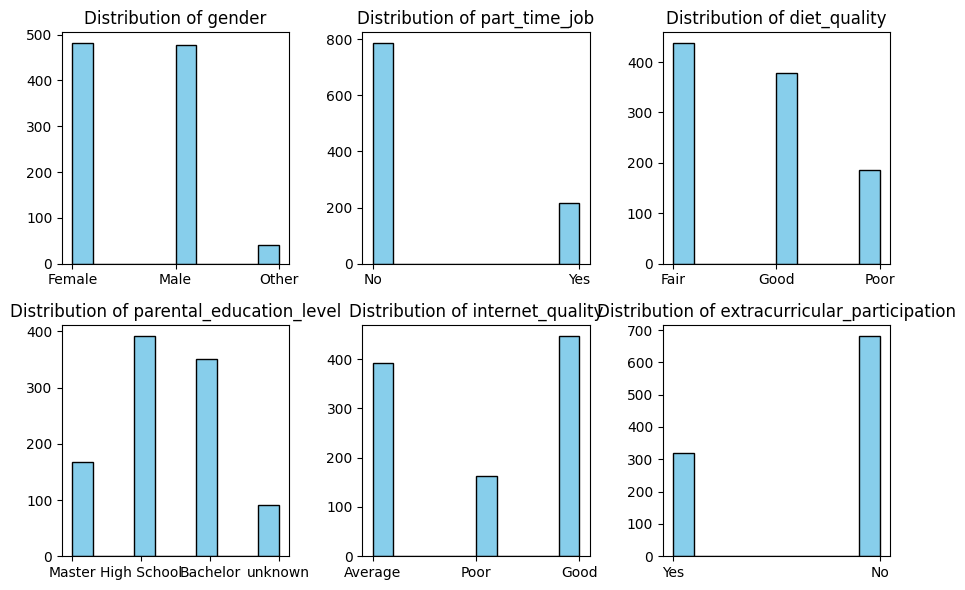

In [28]:
plt.figure(figsize=(9,6))
for i in range(len(categorical_features)):
    plt.subplot(2, 3, i+1)  # subplot index starts at 1
    plt.hist(df[categorical_features[i]], color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {categorical_features[i]}')
    
plt.tight_layout()
plt.show()  # show all plots at once

In [29]:
df[categorical_features].describe()

gender part_time_job diet_quality parental_education_level  \
count     1000          1000         1000                     1000   
unique       3             2            3                        4   
top     Female            No         Fair              High School   
freq       481           785          437                      392   

       internet_quality extracurricular_participation  
count              1000                          1000  
unique                3                             2  
top                Good                            No  
freq                447                           682

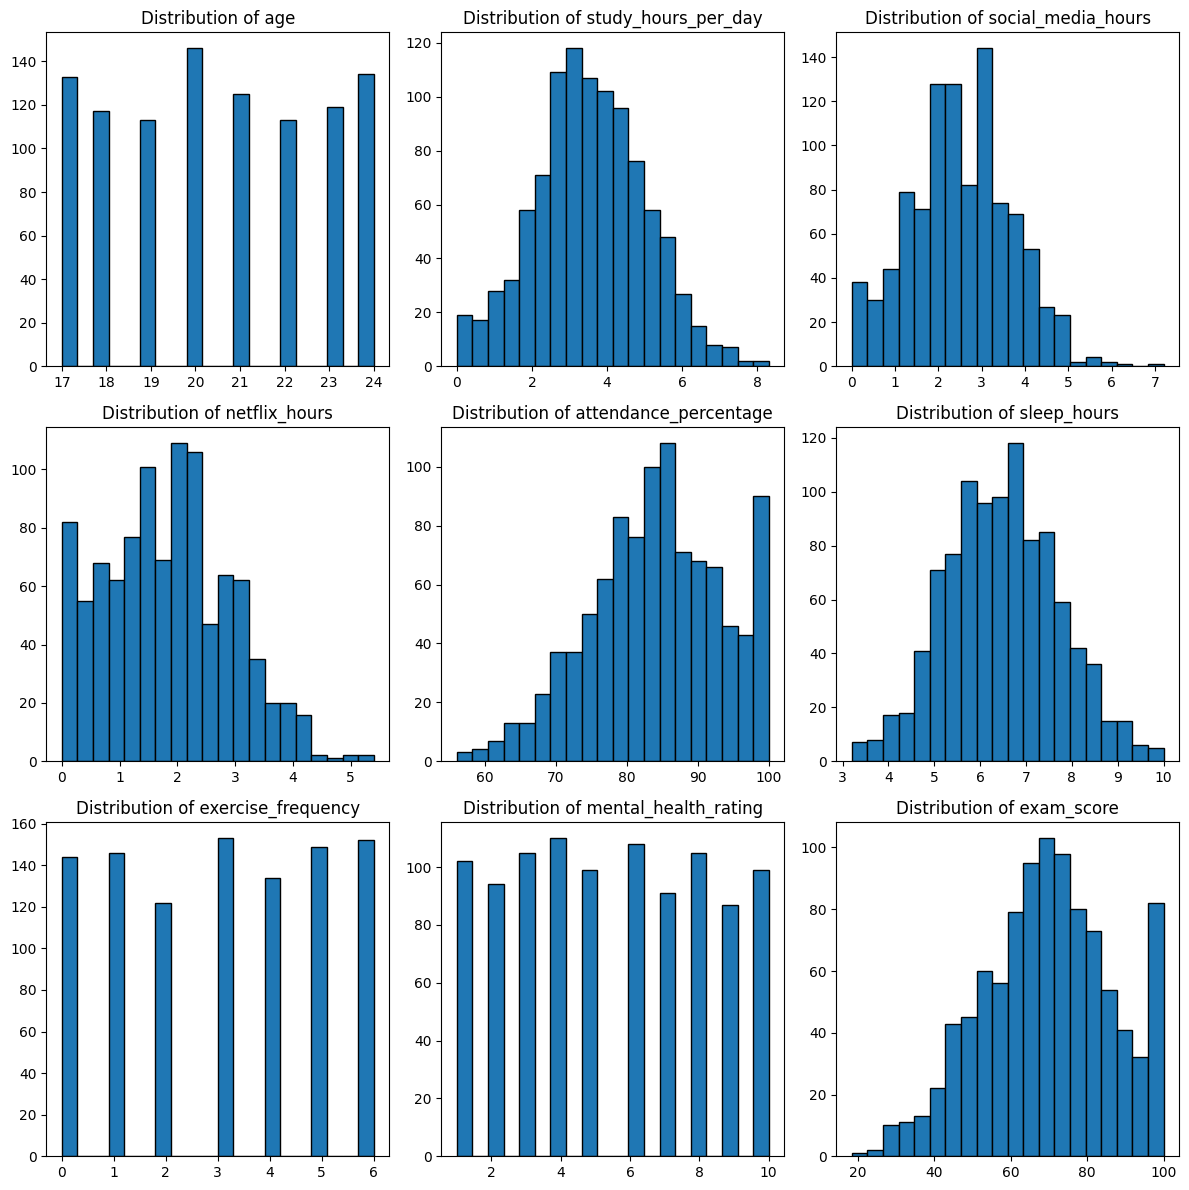

In [30]:
plt.figure(figsize=(12,12))
for i in range(len(numeric_features)):
    plt.subplot(3, 3, i+1)  # subplot index starts at 1
    plt.hist(df[numeric_features[i]],bins=20, edgecolor='black')
    plt.title(f'Distribution of {numeric_features[i]}')
    
plt.tight_layout()
plt.show()  # show all plots at once

In [31]:
df[numeric_features].describe()

age  study_hours_per_day  social_media_hours  netflix_hours  \
count  1000.0000           1000.00000         1000.000000    1000.000000   
mean     20.4980              3.55010            2.505500       1.819700   
std       2.3081              1.46889            1.172422       1.075118   
min      17.0000              0.00000            0.000000       0.000000   
25%      18.7500              2.60000            1.700000       1.000000   
50%      20.0000              3.50000            2.500000       1.800000   
75%      23.0000              4.50000            3.300000       2.525000   
max      24.0000              8.30000            7.200000       5.400000   

       attendance_percentage  sleep_hours  exercise_frequency  \
count            1000.000000  1000.000000         1000.000000   
mean               84.131700     6.470100            3.042000   
std                 9.399246     1.226377            2.025423   
min                56.000000     3.200000            0.000000   
25%                78.000000     5.600000            1.000000   
50%                84.400000     6.500000            3.000000   
75%                91.025000     7.300000            5.000000   
max               100.000000    10.000000            6.000000   

       mental_health_rating   exam_score  
count           1000.000000  1000.000000  
mean               5.438000    69.601500  
std                2.847501    16.888564  
min                1.000000    18.400000  
25%                3.000000    58.475000  
50%                5.000000    70.500000  
75%                8.000000    81.325000  
max               10.000000   100.000000

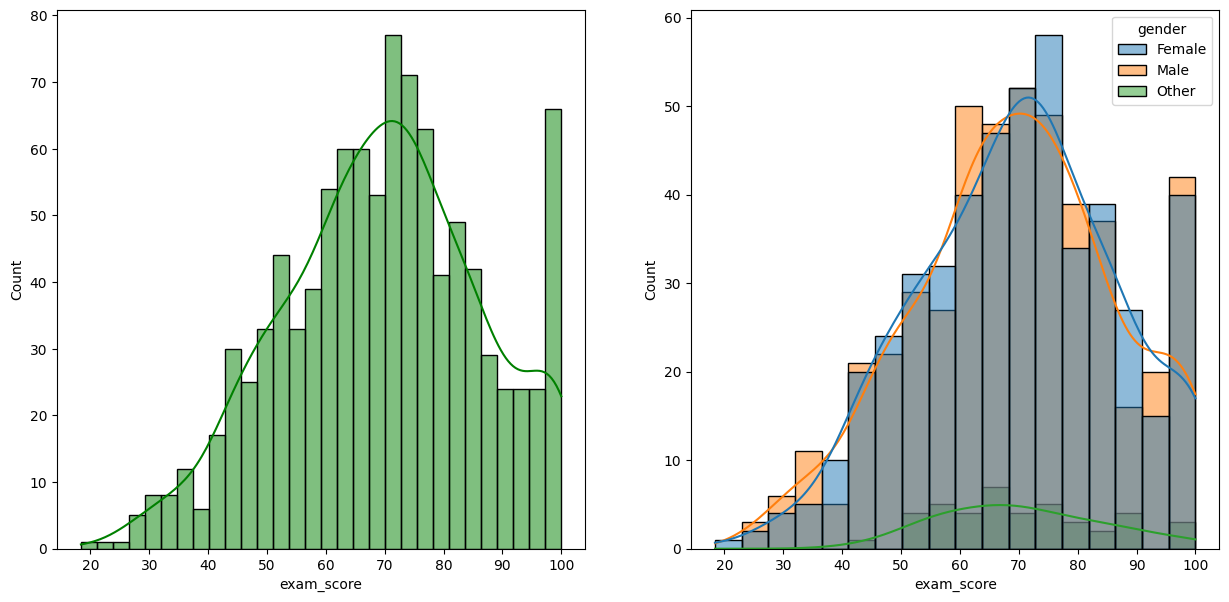

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='exam_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='exam_score',kde=True,hue='gender')
plt.show()

on average female score good average marks but its close competation on high score where male number is slight more

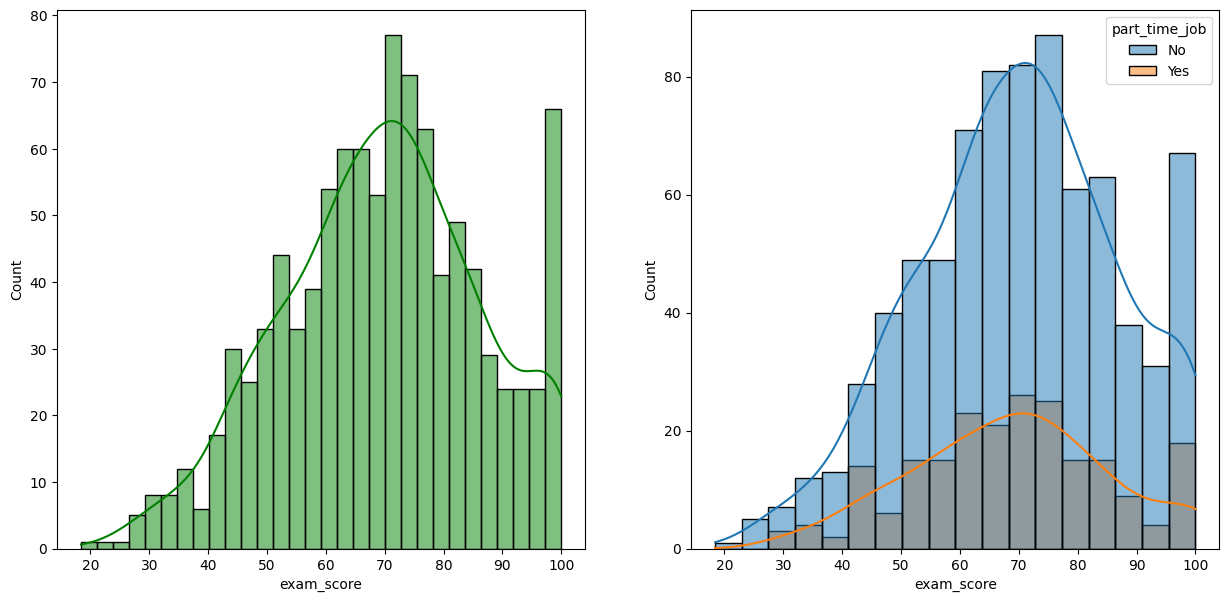

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='exam_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='exam_score',kde=True,hue='part_time_job')
plt.show()

Student with no parttime job tend to score good in exam

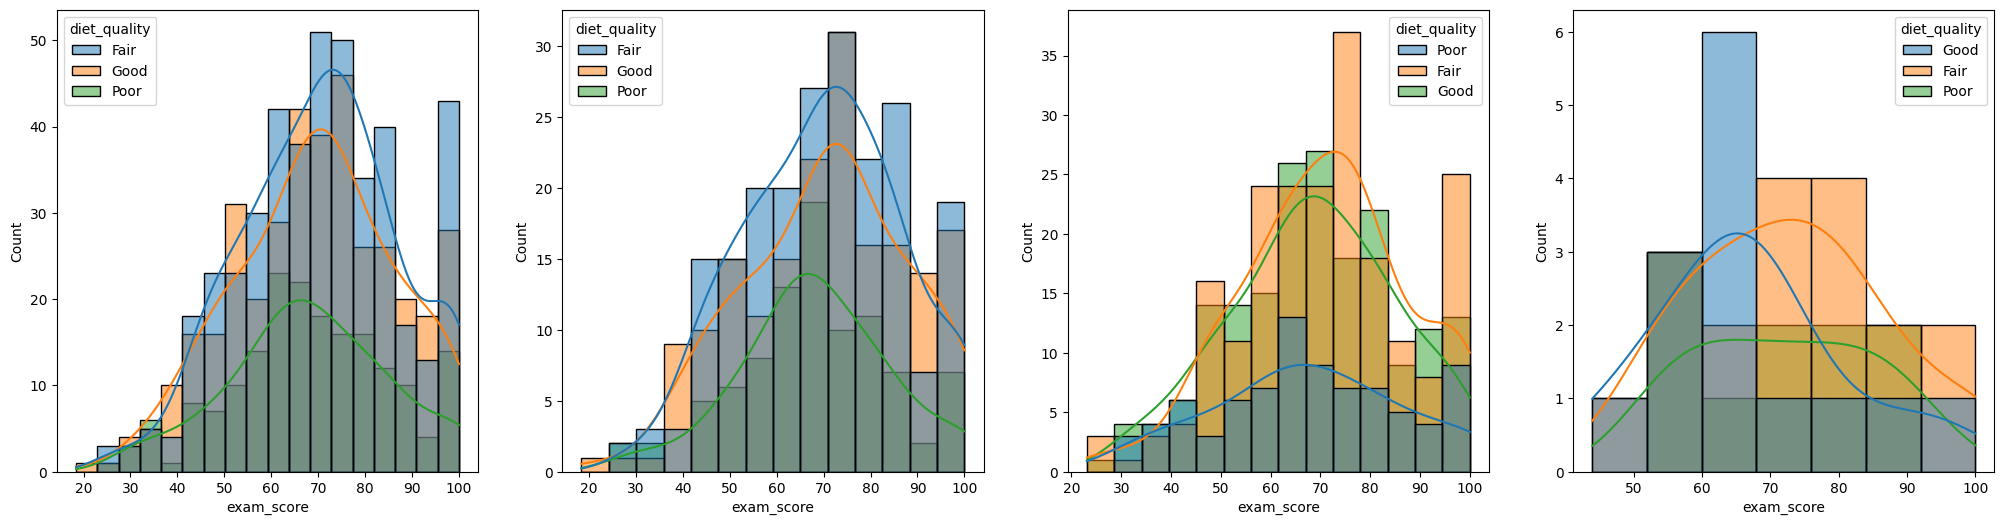

In [34]:
plt.subplots(1,4,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='exam_score',kde=True,hue='diet_quality')
plt.subplot(142)
sns.histplot(data=df[df.gender=='Female'], x='exam_score', kde=True, hue='diet_quality')
plt.subplot(143)
sns.histplot(data=df[df.gender=='Male'],x='exam_score',kde=True,hue='diet_quality')
plt.subplot(144)
sns.histplot(data=df[df.gender=='Other'],x='exam_score',kde=True,hue='diet_quality')
plt.show()

#####  Insights
- Fair diet quality helps perform well in exams.
- Fair diet quality help perform well in exams be it a male or a female or others.

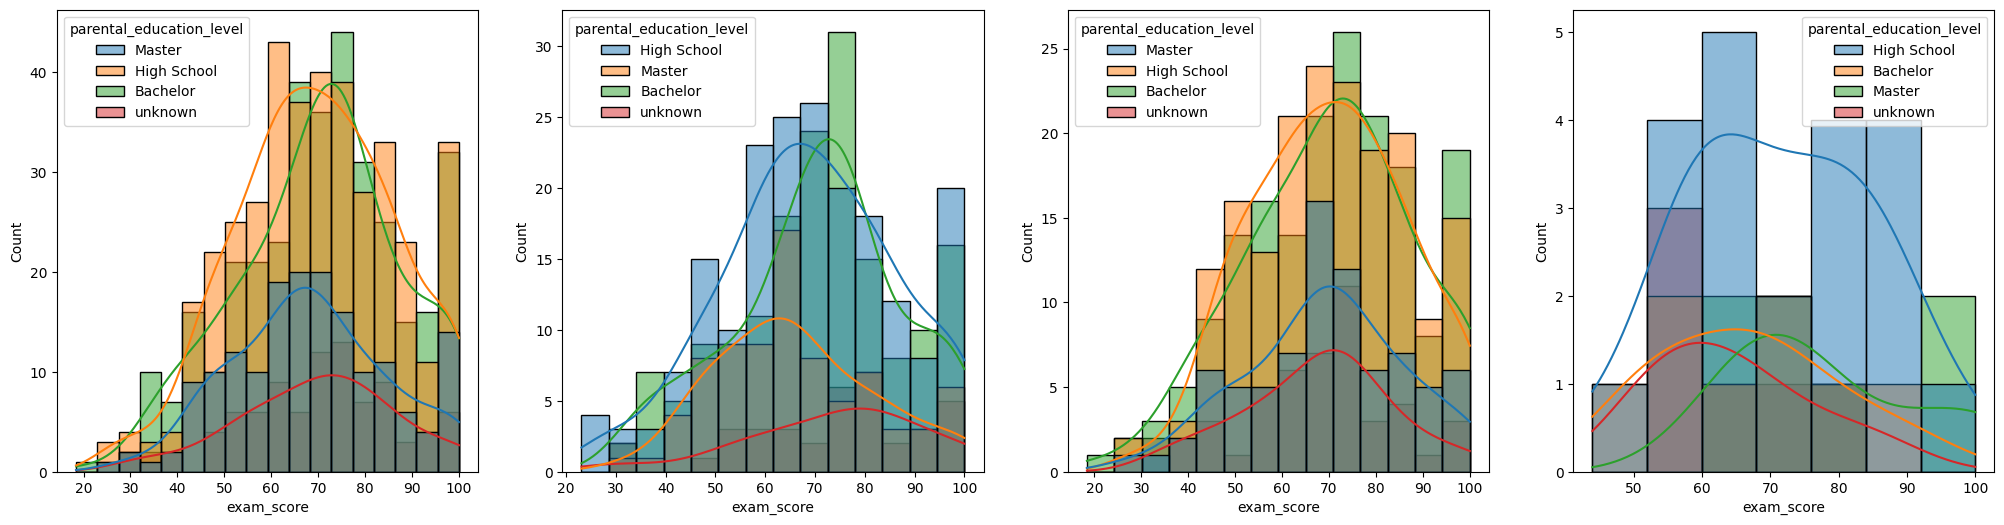

In [35]:
#parental_education_level: ['Master' 'High School' 'Bachelor' 'unknown']
plt.subplots(1,4,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='exam_score',kde=True,hue='parental_education_level')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='Male'],x='exam_score',kde=True,hue='parental_education_level')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='Female'],x='exam_score',kde=True,hue='parental_education_level')
plt.subplot(144)
ax =sns.histplot(data=df[df.gender=='Other'],x='exam_score',kde=True,hue='parental_education_level')
plt.show()

#####  Insights
- first 3 plot shows children of parent with bachelor and high school degree tend to perform well 
- 4th plot we can see there for Other genders high school parental help them to score well in exam.
- In general we conclude parent with much higher degree don't help student perform weill in exam

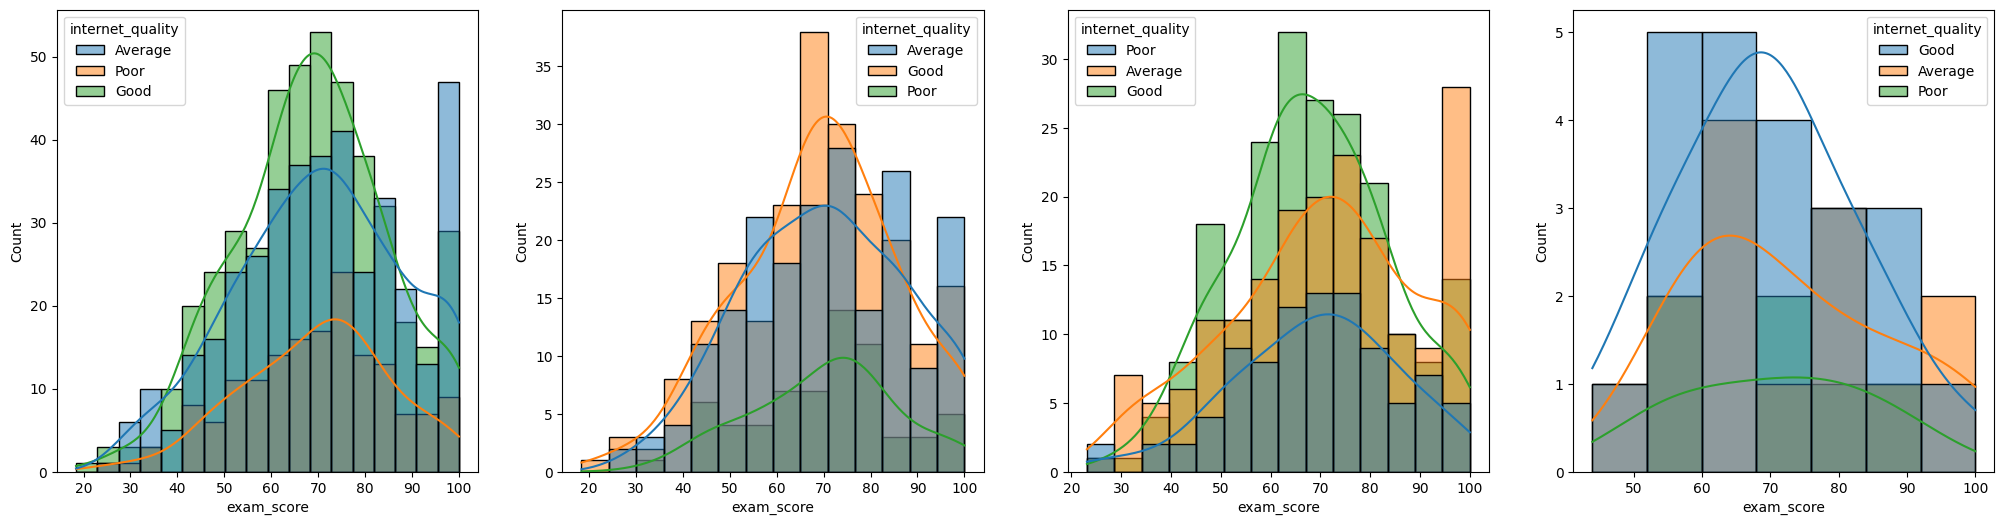

In [36]:
plt.subplots(1,4,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='exam_score',kde=True,hue='internet_quality')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='Female'],x='exam_score',kde=True,hue='internet_quality')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='Male'],x='exam_score',kde=True,hue='internet_quality')
plt.subplot(144)
ax =sns.histplot(data=df[df.gender=='Other'],x='exam_score',kde=True,hue='internet_quality')
plt.show()

#####  Insights
- Student with good internet quality helps them to perform well in exam

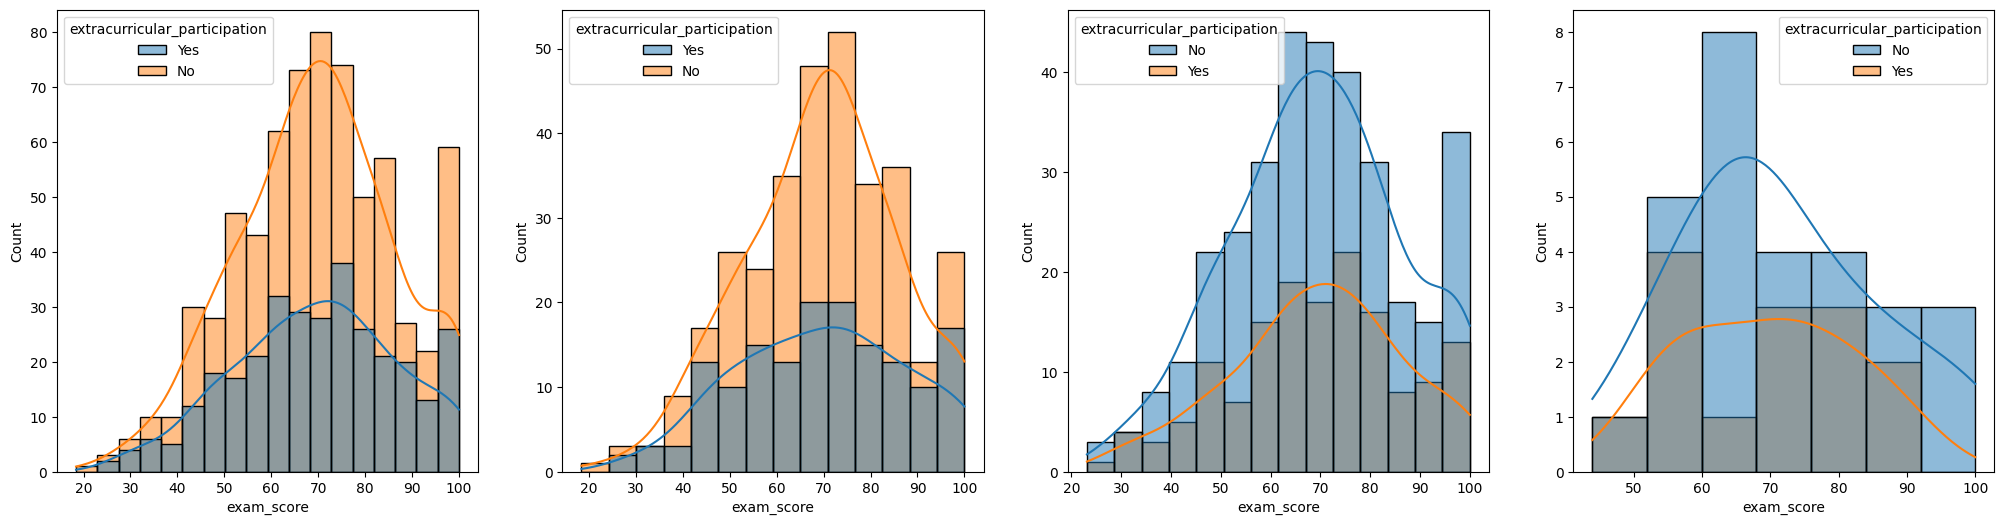

In [37]:
plt.subplots(1,4,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='exam_score',kde=True,hue='extracurricular_participation')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='Female'],x='exam_score',kde=True,hue='extracurricular_participation')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='Male'],x='exam_score',kde=True,hue='extracurricular_participation')
plt.subplot(144)
ax =sns.histplot(data=df[df.gender=='Other'],x='exam_score',kde=True,hue='extracurricular_participation')
plt.show()

#####  Insights
- extracurricular activity tends to impact negatively on their exam score despite any gender 

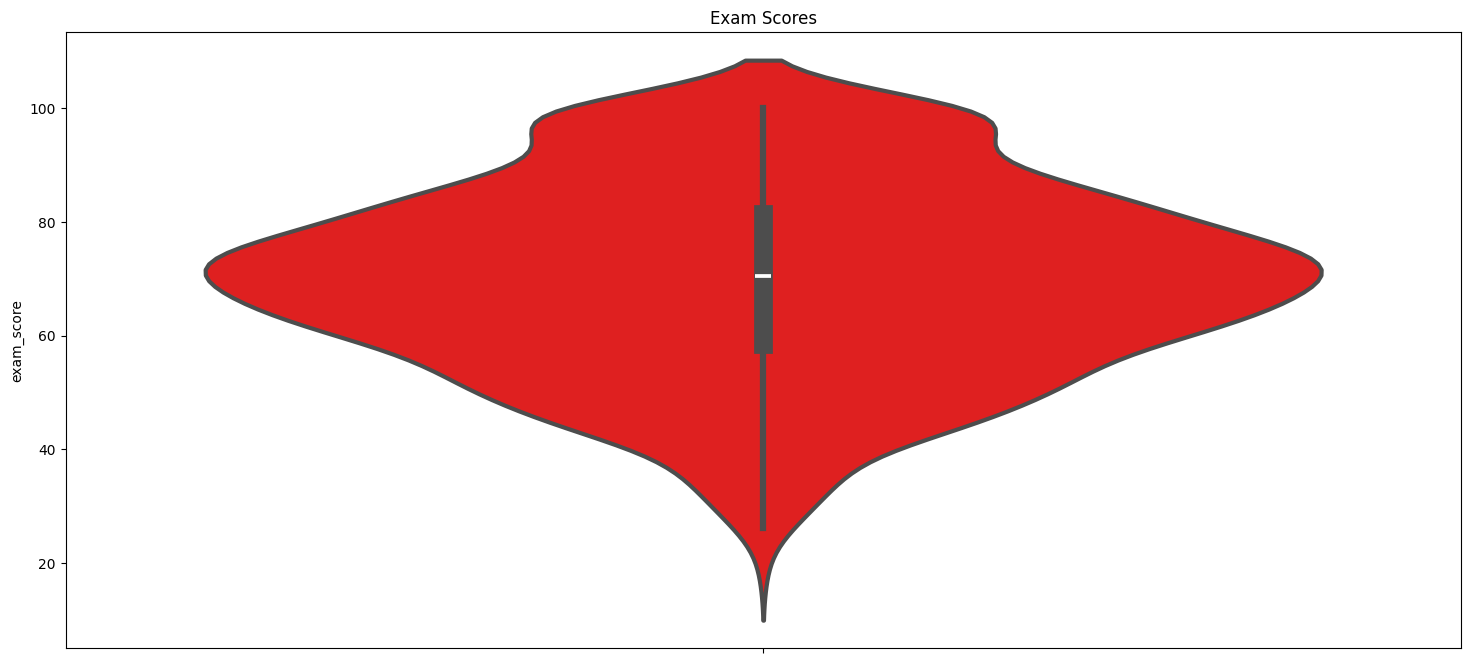

In [38]:
plt.figure(figsize=(18,8))
plt.subplot()
plt.title('Exam Scores')
sns.violinplot(y='exam_score',data=df,color='red',linewidth=3)
plt.show()

#### Insights
- Most of the student score between 60-80

#### 4.3 Multivariate analysis using pieplot

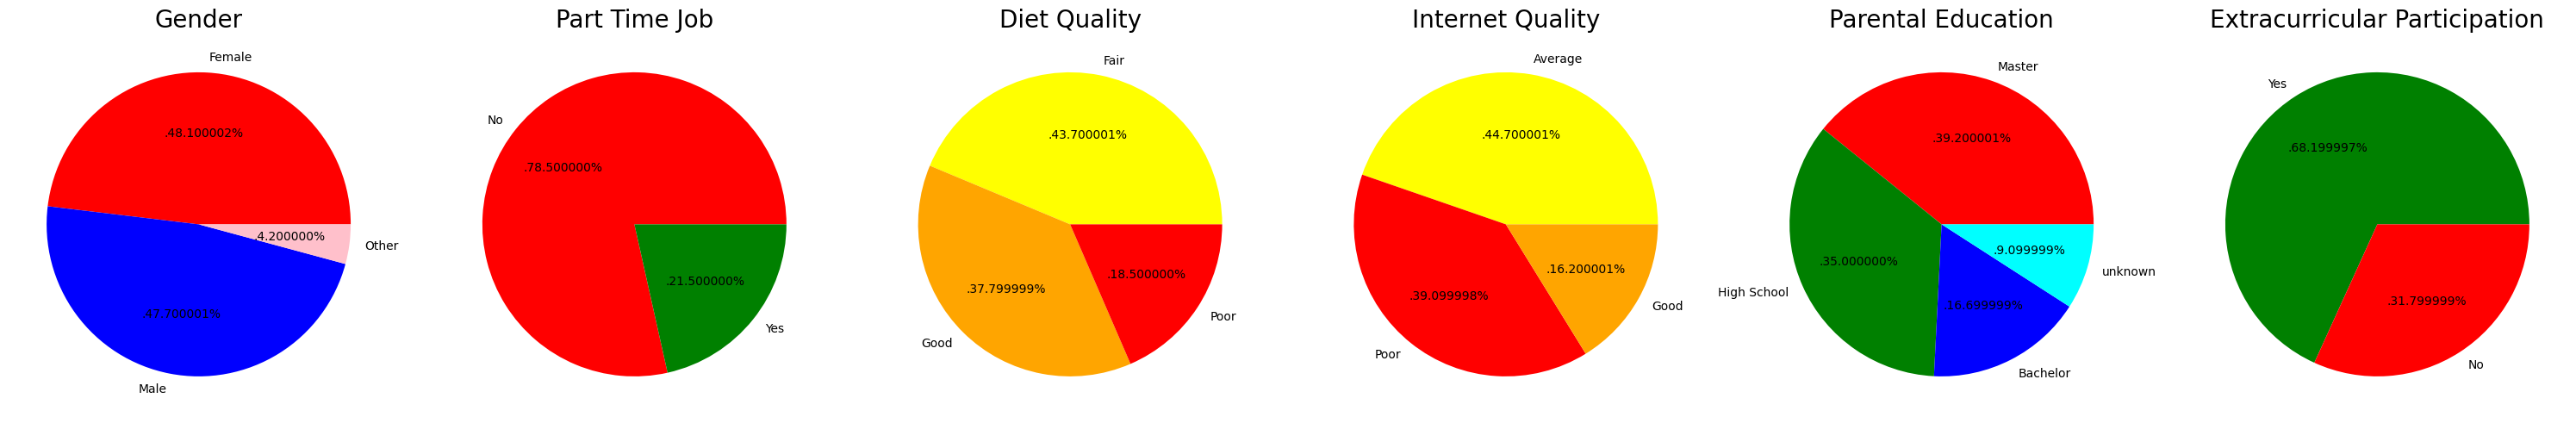

In [39]:
plt.rcParams['figure.figsize'] = (30, 30)

plt.subplot(1, 6, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male', 'Other'
color = ['red','blue', 'pink']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 6, 2)
size = df['part_time_job'].value_counts()
labels = 'No', 'Yes'
color = ['red', 'green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Part Time Job', fontsize = 20)
plt.axis('off')



plt.subplot(1, 6, 3)
size = df['diet_quality'].value_counts()
labels = 'Fair','Good','Poor'
color = ['Yellow','orange', 'red']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Diet Quality', fontsize = 20)
plt.axis('off')


plt.subplot(1, 6, 4)
size = df['internet_quality'].value_counts()
labels = 'Average','Poor','Good'
color = ['yellow','red', 'orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Internet Quality', fontsize = 20)
plt.axis('off')


plt.subplot(1, 6, 5)
size = df['parental_education_level'].value_counts()
labels = 'Master', 'High School', 'Bachelor', 'unknown'
color = ['red', 'green', 'blue', 'cyan']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.subplot(1, 6, 6)
size = df['extracurricular_participation'].value_counts()
labels = 'Yes', 'No'
color = ['green', 'red']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Extracurricular Participation', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#####  Insights
- Number of Male and Female students is almost equal but have lower number of other student
- Number students with no part time job is less
- Number of students who have fair diet quality is 43% followed by 37% good and 18% fair diet quality
- Number of students with average internet quality is more with 44% followed by 39% with poor and only 16% have good quality
- Number of students with extracurricular Participation are more compare with no extracurricular activity

#### 4.4 Feature Wise Visualization
#### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

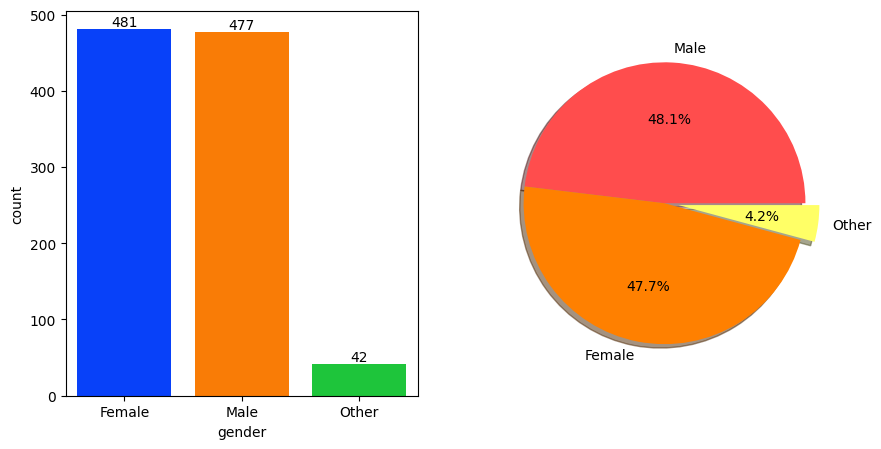

In [40]:
f,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female', 'Other'],explode=[0,0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000', '#ffff66'])
plt.show()

#### Insights 
- Gender has data with Male 44% female 47% and other with 4% only

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

In [41]:
gender_group = df.groupby('gender').count()
gender_group

age  study_hours_per_day  social_media_hours  netflix_hours  \
gender                                                                
Female  481                  481                 481            481   
Male    477                  477                 477            477   
Other    42                   42                  42             42   

        part_time_job  attendance_percentage  sleep_hours  diet_quality  \
gender                                                                    
Female            481                    481          481           481   
Male              477                    477          477           477   
Other              42                     42           42            42   

        exercise_frequency  parental_education_level  internet_quality  \
gender                                                                   
Female                 481                       481               481   
Male                   477                       477               477   
Other                   42                        42                42   

        mental_health_rating  extracurricular_participation  exam_score  \
gender                                                                    
Female                   481                            481         481   
Male                     477                            477         477   
Other                     42                             42          42   

        total_screen_time  study_sleep_ratio  
gender                                        
Female                481                481  
Male                  477                477  
Other                  42                 42

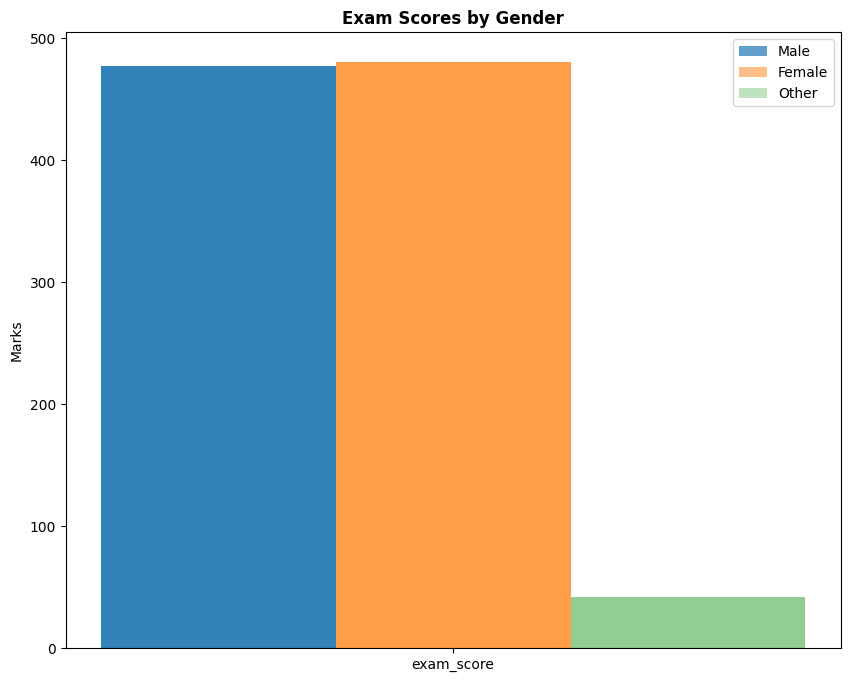

In [42]:
plt.figure(figsize=(10, 8))

X = ['exam_score']


female_scores = [gender_group['exam_score'][0], gender_group['exam_score'][0]]
male_scores = [gender_group['exam_score'][1], gender_group['exam_score'][1]]
other_score = [gender_group['exam_score'][2], gender_group['exam_score'][2]]


X_axis = np.arange(len(X))
  
plt.bar(X_axis -0.4, male_scores, 0.4, label = 'Male', alpha=0.7)
plt.bar(X_axis , female_scores, 0.4, label = 'Female', alpha=0.5)
plt.bar(X_axis + 0.4, other_score, 0.4, label = 'Other', alpha=0.3)

  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Exam Scores by Gender", fontweight='bold')
plt.legend()
plt.show()

#### 4.4.2 Part Time job COLUMN
- How is Group wise distribution ?
- Has Part time job any impact on student's performance ?

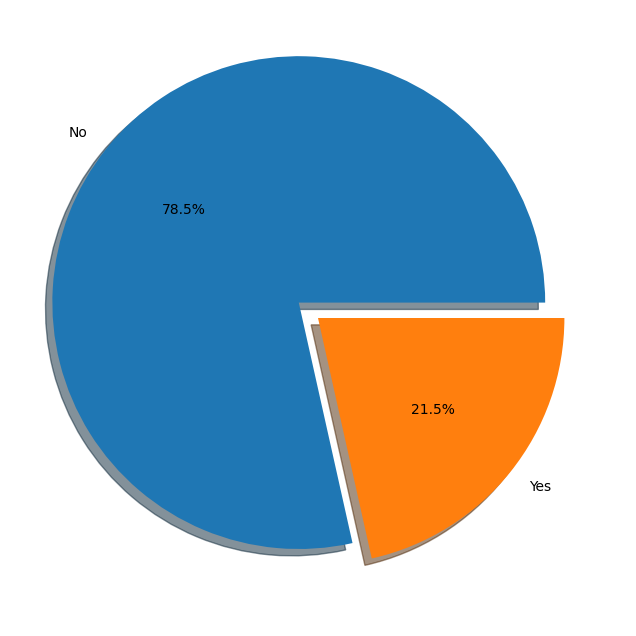

In [43]:
plt.figure(figsize=(10, 8))
sns.countplot(x=df['part_time_job'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['part_time_job'].value_counts(),labels=df['part_time_job'].value_counts().index,explode=[0.1,0],autopct='%1.1f%%',shadow=True)
plt.show()   

#### Insights 
- Most of the student don't have part time job

#### BIVARIATE ANALYSIS ( does part time job has any impact on student's performance ? )

In [44]:
Group_data2=df.groupby('part_time_job').agg({'exam_score':'mean'})
Group_data2

exam_score
part_time_job            
No              69.836561
Yes             68.743256

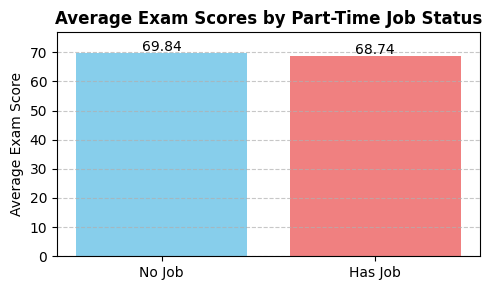

In [45]:
# 1. Correctly calculate the average exam score for each group
average_scores = df.groupby('part_time_job')['exam_score'].mean()

# 2. Extract the required scores
no_job_score = average_scores['No']
has_job_score = average_scores['Yes']

# 3. Define the plotting data
labels = ['No Job', 'Has Job']
scores = [no_job_score, has_job_score]

# 4. Create the bar plot
plt.figure(figsize=(5, 3))

plt.bar(labels, scores, color=['skyblue', 'lightcoral'])
 
plt.ylabel("Average Exam Score")
plt.title("Average Exam Scores by Part-Time Job Status", fontweight='bold')

# Add score labels on top of the bars
for i, score in enumerate(scores):
    plt.text(i, score + 0.5, f'{score:.2f}', ha='center')

plt.ylim(0, max(scores) * 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Insights 
- Average score related to part time job is very close 

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

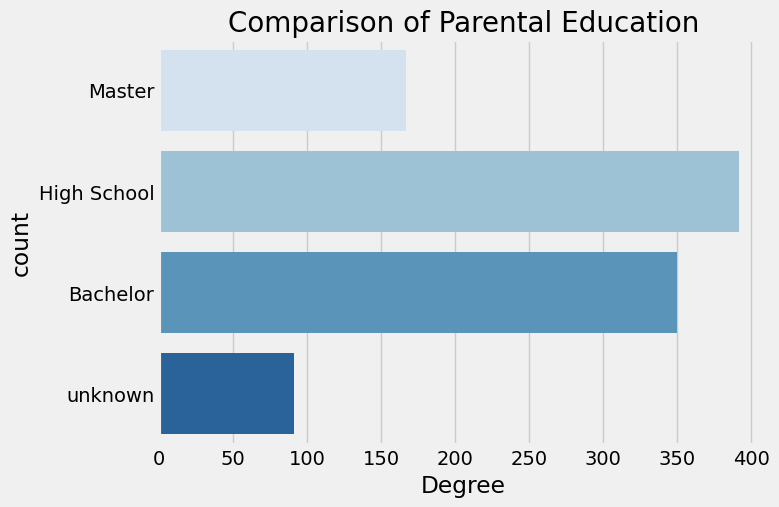

In [46]:

plt.rcParams['figure.figsize'] = (7, 5)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_education_level'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#### INsight:
- mostly parent are bachelor and high school leveler

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

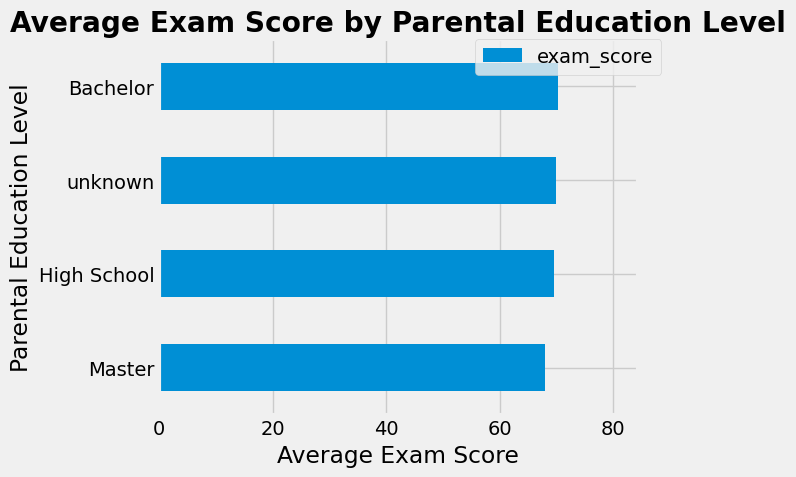

In [47]:
education_means = df.groupby('parental_education_level')['exam_score'].mean().sort_values(ascending=True)
education_means.plot(kind='barh', figsize=(7,5))
plt.legend(bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0.)
plt.xlabel("Average Exam Score")
plt.ylabel("Parental Education Level")
plt.title("Average Exam Score by Parental Education Level", fontweight='bold')
plt.xlim(0, education_means.max() * 1.2) 
plt.tight_layout()
plt.show()

#### Insights 
- The bar chart visually represents these means, showing that students whose parents have a Bachelor's degree scored the highest on average

#### 4.4.4 DIet Quality
- Which diet quality is most common among students ?
- What is the effect of diet quality type on test results?


#### UNIVARIATE ANALYSIS ( Which diet quality is most common amoung students ? )

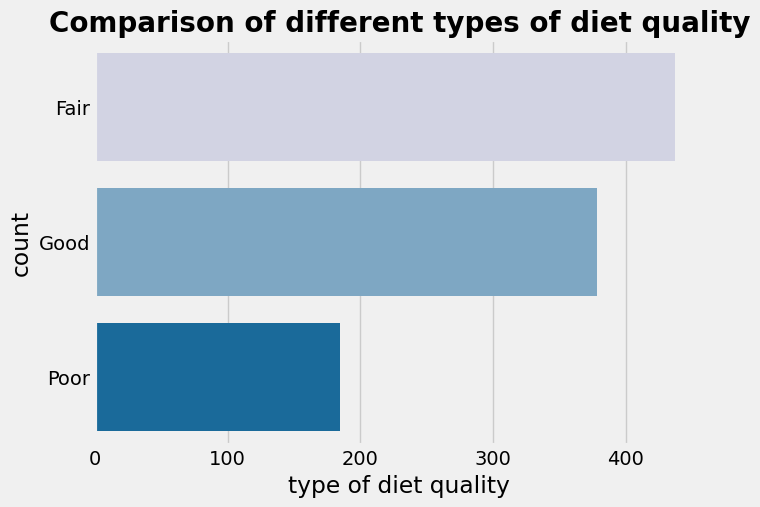

In [48]:
plt.rcParams['figure.figsize']= (7,5)
plt.style.use('fivethirtyeight')
sns.countplot(df['diet_quality'], palette = 'PuBu')
plt.title("Comparison of different types of diet quality", fontdict={'fontweight' : 'bold', 'size':20})
plt.xlabel('type of diet quality')
plt.ylabel('count')
plt.show()

#### Insight 
- mostily student have fair quality of diet

#### BIVARIATE ANALYSIS (  Is diet quality type intake has any impact on student's performance ? )

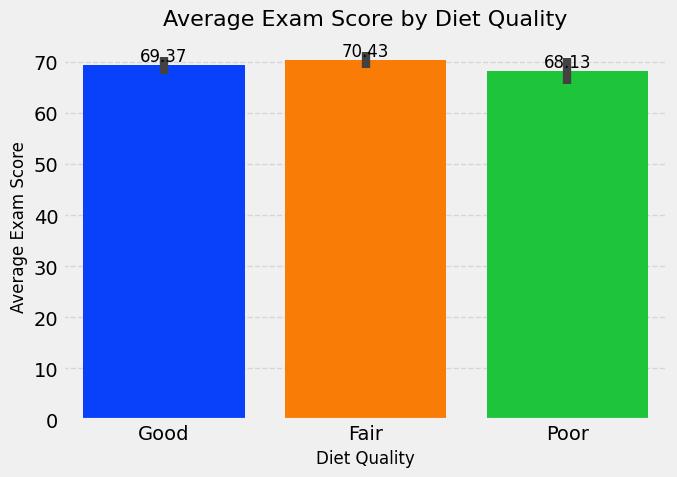

In [49]:
diet_order = ['Good', 'Fair', 'Poor']
ax = sns.barplot(
    x='diet_quality', 
    y='exam_score', 
    data=df, 
    order=diet_order,
    palette='bright',
    saturation=0.95
)

ax.set_title("Average Exam Score by Diet Quality", fontsize=16)
ax.set_xlabel("Diet Quality", fontsize=12)
ax.set_ylabel("Average Exam Score", fontsize=12)

# Add labels (Mean score) on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', color='black', size=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Insight
-The students who reported having a Fair Diet scored the highest on average, followed by those with a Good Diet.

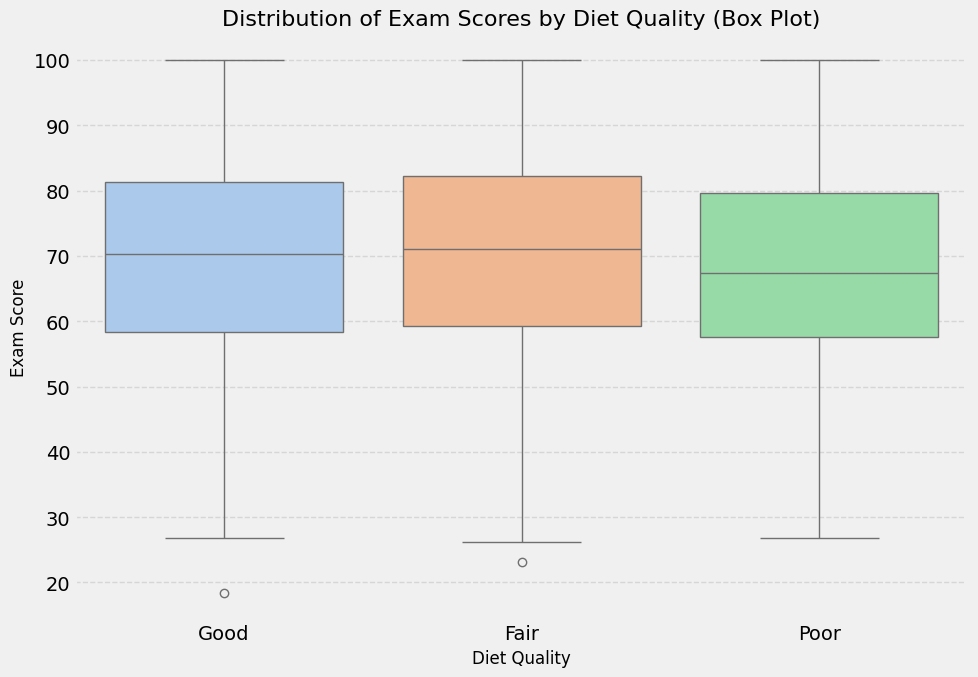

In [50]:
# --- Box Plot Generation ---
# Define the order for the categorical variable for better visualization
diet_order = ['Good', 'Fair', 'Poor']
df['diet_quality'] = pd.Categorical(df['diet_quality'], categories=diet_order, ordered=True)

plt.figure(figsize=(10, 7))

# Create the box plot using seaborn
ax = sns.boxplot(
    x='diet_quality', 
    y='exam_score', 
    data=df, 
    order=diet_order,
    palette='pastel' # Use a different palette for contrast
)

# Add titles and labels
ax.set_title("Distribution of Exam Scores by Diet Quality (Box Plot)", fontsize=16)
ax.set_xlabel("Diet Quality", fontsize=12)
ax.set_ylabel("Exam Score", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### 4.4.5 Interner quality column


<Axes: xlabel='internet_quality', ylabel='exam_score'>

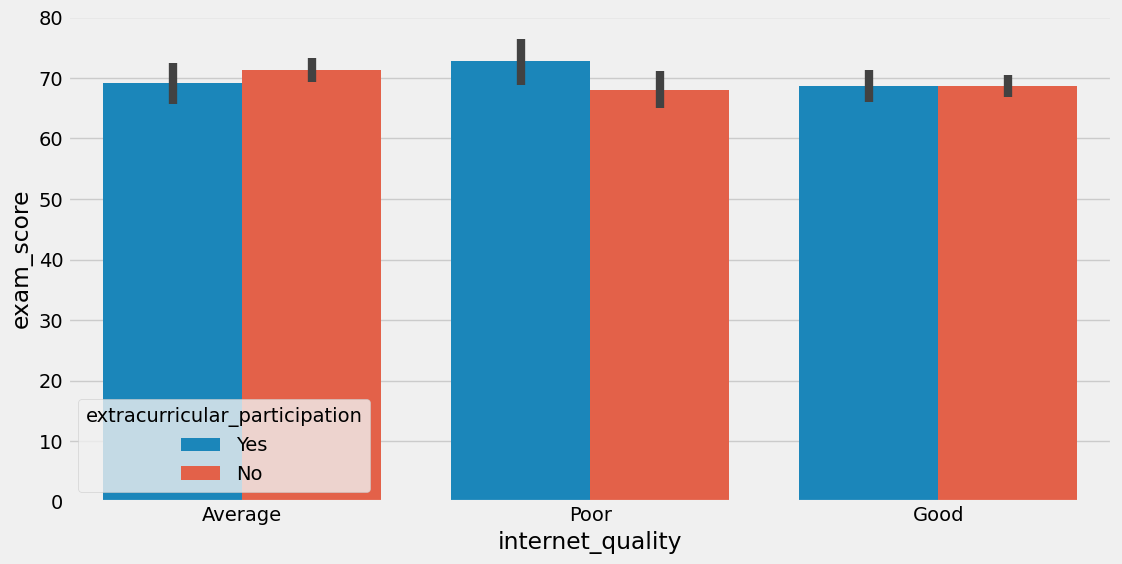

In [51]:
plt.figure(figsize=(12,6))
sns.barplot (x=df['internet_quality'], y=df['exam_score'], hue=df['extracurricular_participation'])


#### 4.4.6 CHECKING OUTLIERS

In [55]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

In [56]:
categorical_features

['gender',
 'part_time_job',
 'parental_education_level',
 'internet_quality',
 'extracurricular_participation']

In [58]:
df[categorical_features].describe()

gender part_time_job parental_education_level internet_quality  \
count     1000          1000                     1000             1000   
unique       3             2                        4                3   
top     Female            No              High School             Good   
freq       481           785                      392              447   

       extracurricular_participation  
count                           1000  
unique                             2  
top                               No  
freq                             682

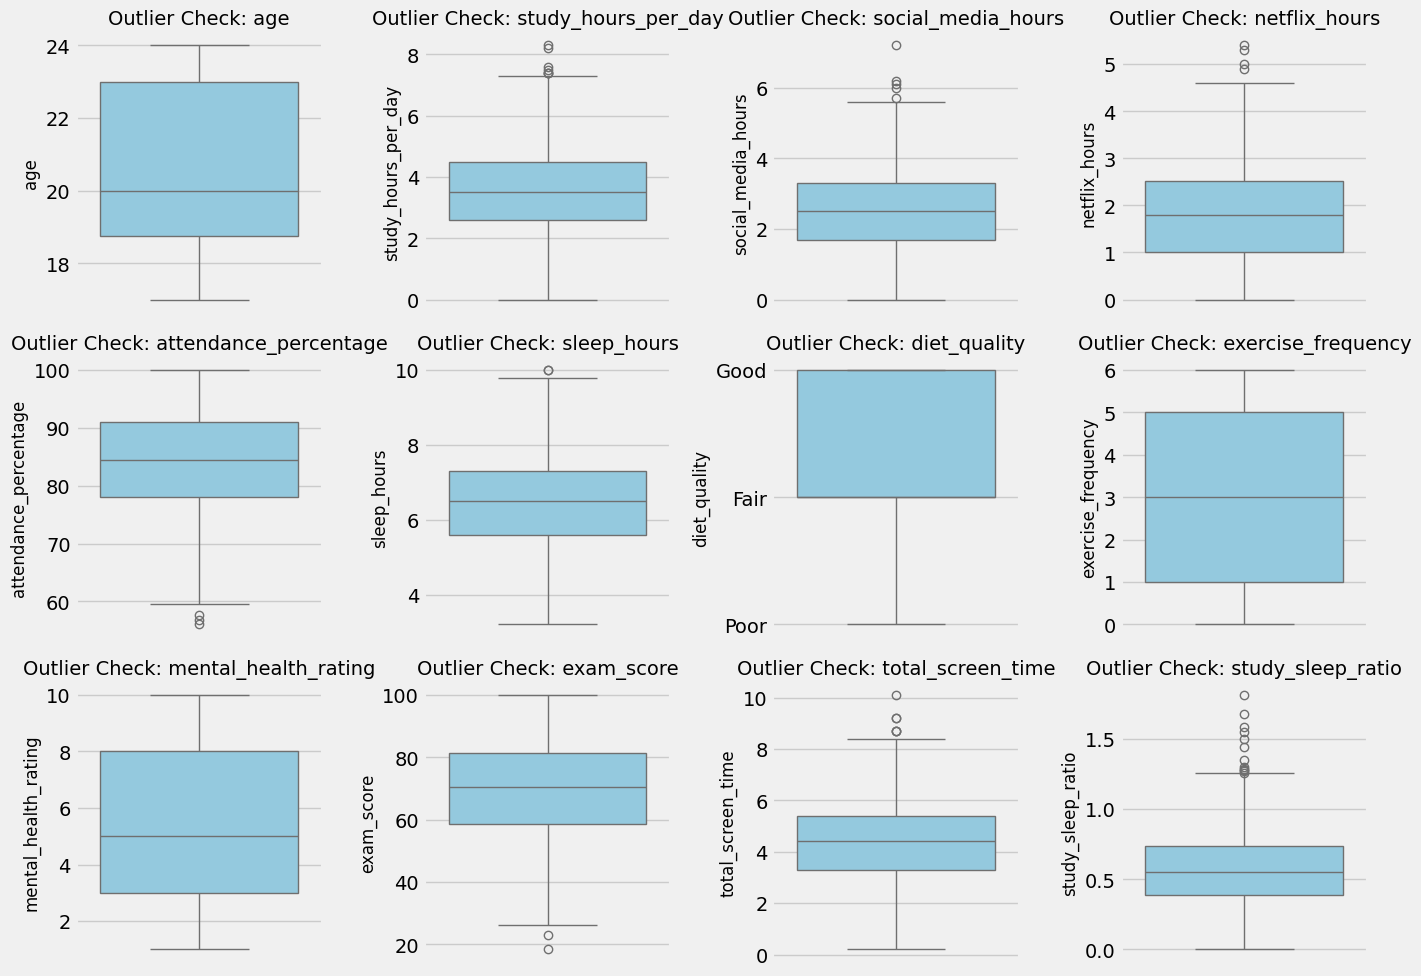

In [59]:
# --- Outlier Check (Box Plots for key numerical features) ---
numerical_features = df[numeric_features]
# Set up the subplot layout
fig, axes = plt.subplots(3, 4, figsize=(14, 10))
axes = axes.flatten() # Flatten the 2x2 array of axes for easy iteration

# Create a box plot for each selected numerical column
for i, col in enumerate(numerical_features):
    sns.boxplot(y=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Outlier Check: {col}', fontsize=14)
    axes[i].set_ylabel(col, fontsize=12)

plt.tight_layout()

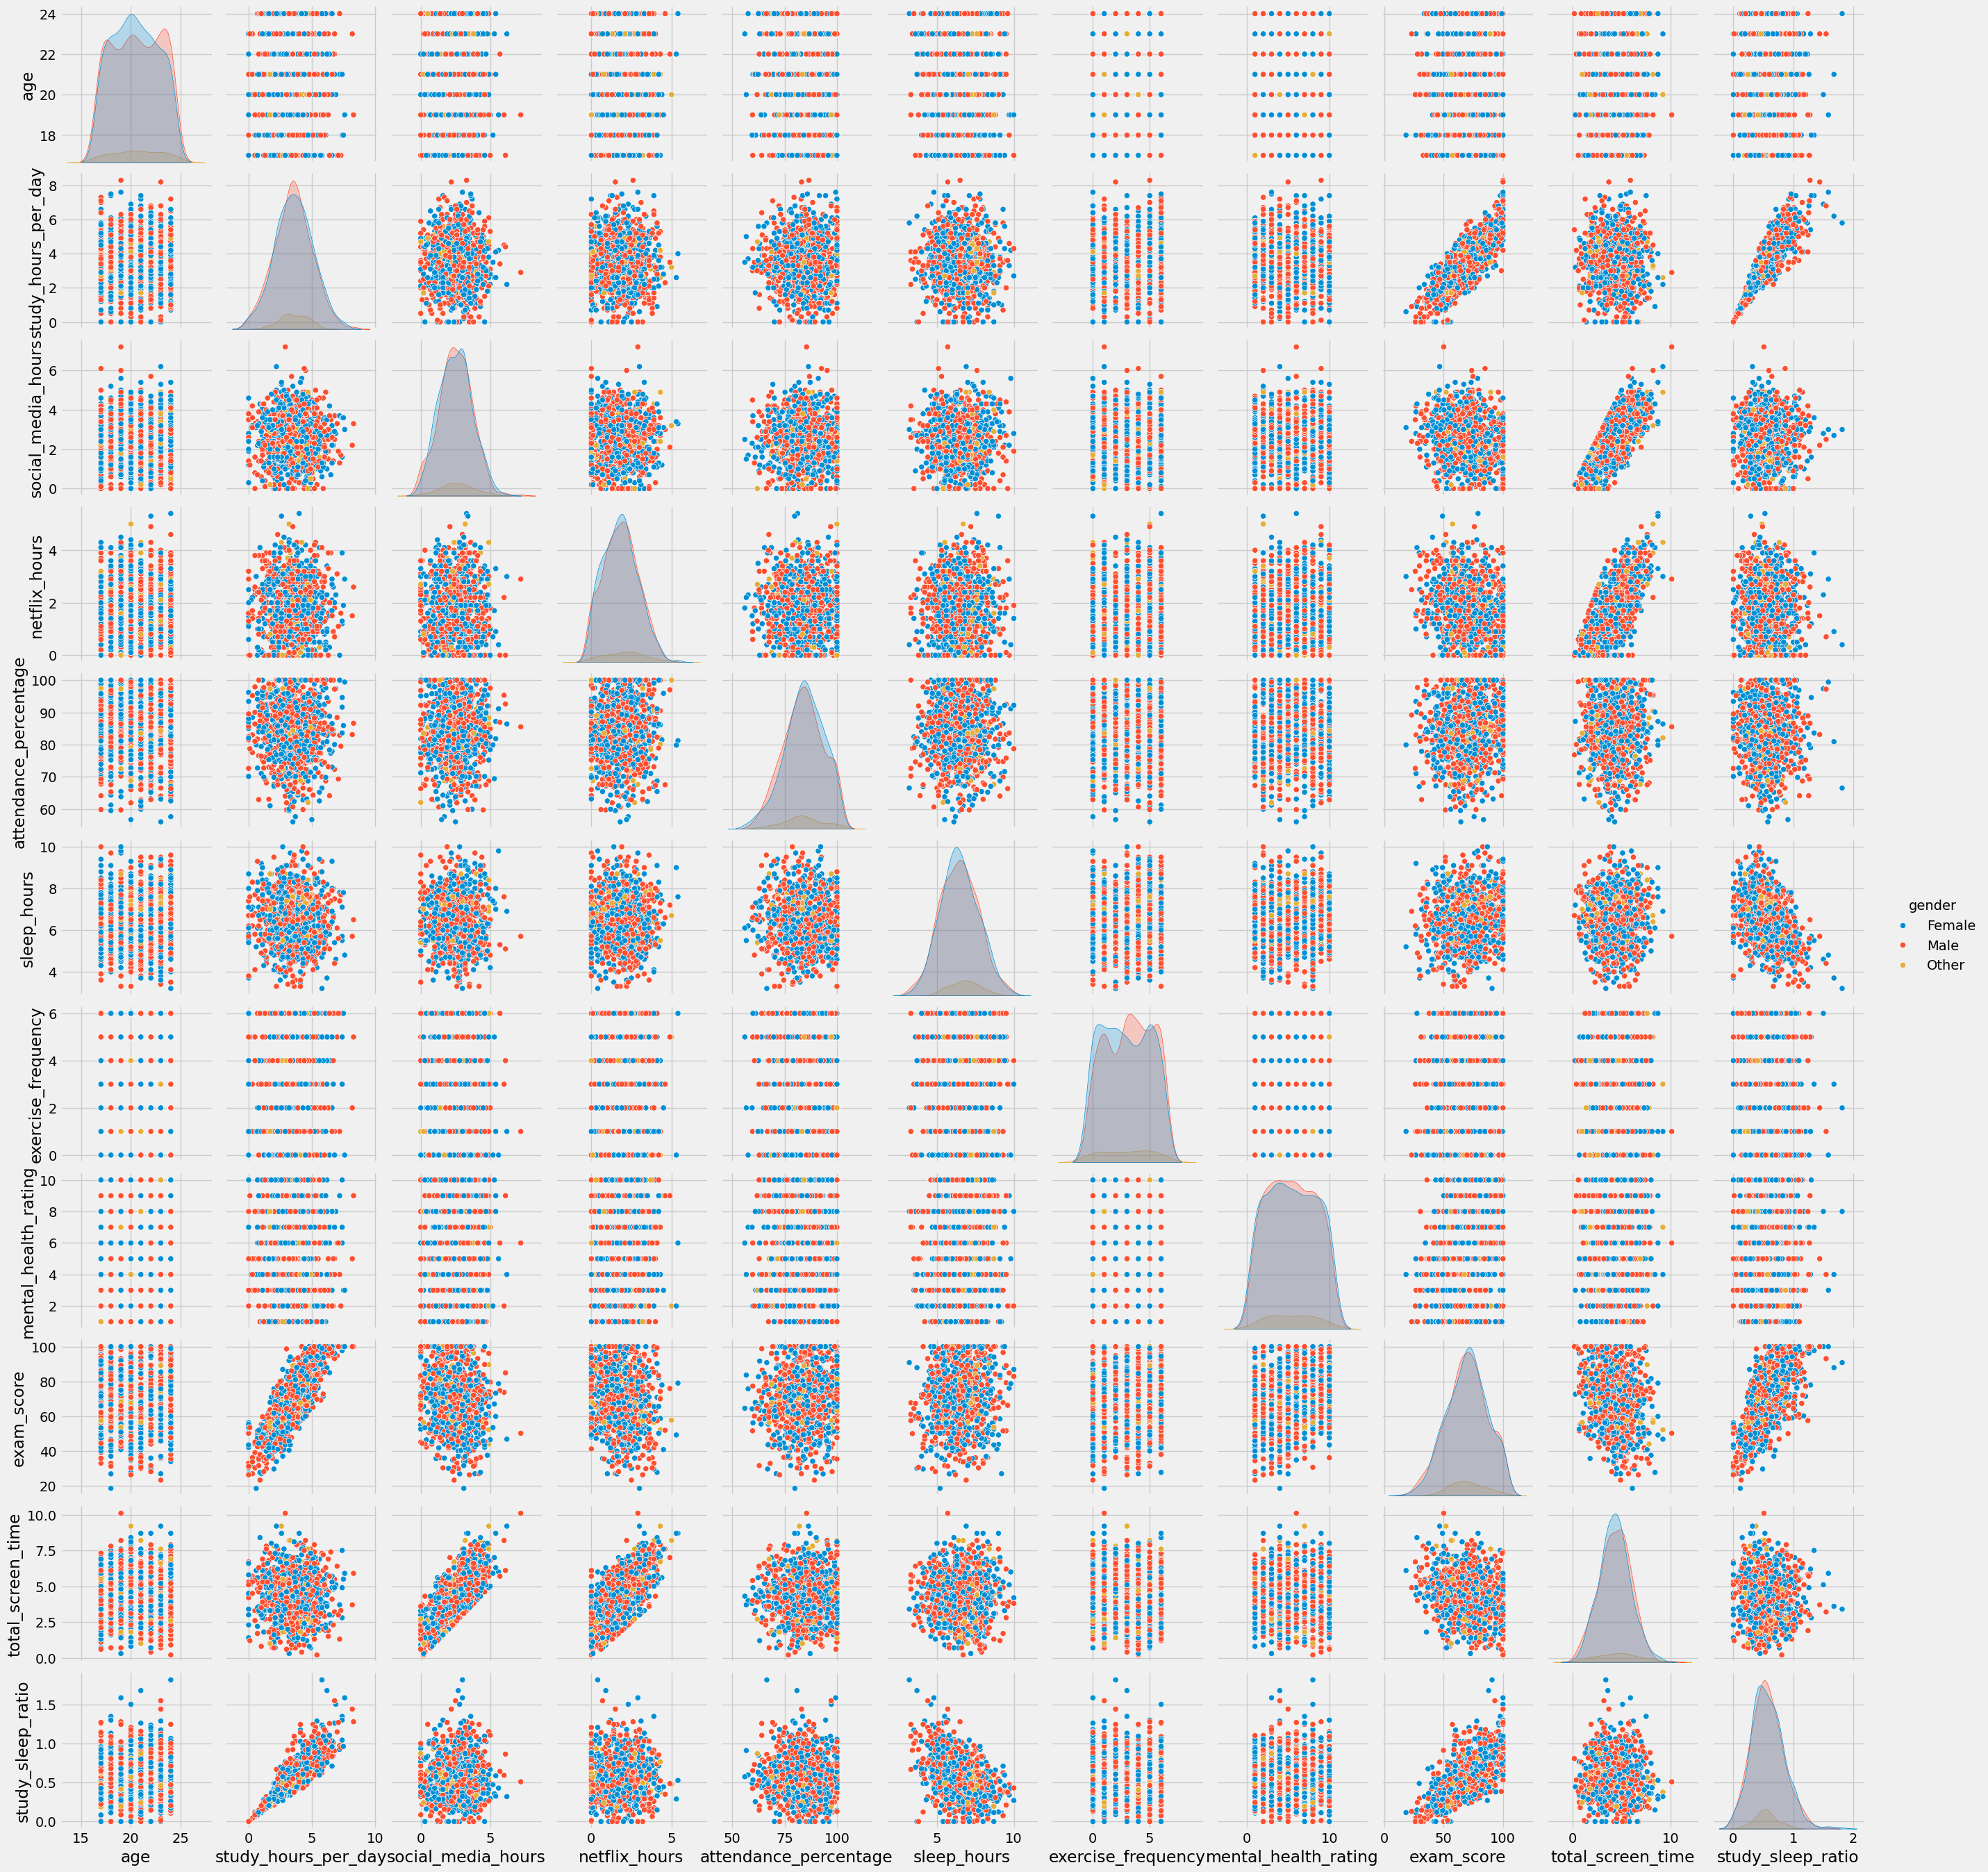

In [60]:
sns.pairplot(df,hue = 'gender')
plt.show()

Handling Outlier

In [80]:
# Define the columns for detailed outlier quantification#
cols_to_quantify = df.select_dtypes(exclude=['object']).columns.to_list()
cols_to_quantify

['age',
 'study_hours_per_day',
 'social_media_hours',
 'netflix_hours',
 'attendance_percentage',
 'sleep_hours',
 'diet_quality',
 'exercise_frequency',
 'mental_health_rating',
 'exam_score',
 'total_screen_time',
 'study_sleep_ratio']

In [81]:
cols_to_quantify.remove('diet_quality')
cols_to_quantify

['age',
 'study_hours_per_day',
 'social_media_hours',
 'netflix_hours',
 'attendance_percentage',
 'sleep_hours',
 'exercise_frequency',
 'mental_health_rating',
 'exam_score',
 'total_screen_time',
 'study_sleep_ratio']

In [82]:
# Define the columns for detailed outlier quantification

outlier_summary = {}

for col in cols_to_quantify:
    # Calculate Quartiles and IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define outlier bounds (1.5 * IQR rule)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    lower_outliers = df[df[col] < lower_bound].shape[0]
    upper_outliers = df[df[col] > upper_bound].shape[0]
    
    outlier_summary[col] = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower_Bound': lower_bound,
        'Upper_Bound': upper_bound,
        'Lower_Outliers': lower_outliers,
        'Upper_Outliers': upper_outliers,
        'Total_Outliers': lower_outliers + upper_outliers
    }

# Convert the summary to a DataFrame for clean output
summary_df = pd.DataFrame(outlier_summary).T

print("Outlier Quantification (using 1.5 * IQR rule):")
print(summary_df[['Q1', 'Q3', 'Lower_Bound', 'Upper_Bound', 'Lower_Outliers', 'Upper_Outliers', 'Total_Outliers']])

Outlier Quantification (using 1.5 * IQR rule):
                              Q1         Q3  Lower_Bound  Upper_Bound  \
age                    18.750000  23.000000    12.375000    29.375000   
study_hours_per_day     2.600000   4.500000    -0.250000     7.350000   
social_media_hours      1.700000   3.300000    -0.700000     5.700000   
netflix_hours           1.000000   2.525000    -1.287500     4.812500   
attendance_percentage  78.000000  91.025000    58.462500   110.562500   
sleep_hours             5.600000   7.300000     3.050000     9.850000   
exercise_frequency      1.000000   5.000000    -5.000000    11.000000   
mental_health_rating    3.000000   8.000000    -4.500000    15.500000   
exam_score             58.475000  81.325000    24.200000   115.600000   
total_screen_time       3.300000   5.400000     0.150000     8.550000   
study_sleep_ratio       0.384615   0.734227    -0.139802     1.258644   

                       Lower_Outliers  Upper_Outliers  Total_Outliers  
age 

Since the number of Outlier is very small compare to dataset, deletion is not the best choice so we are using capping method

In [85]:
numerical_cols_to_cap = cols_to_quantify
for col in numerical_cols_to_cap:
    # 1. Calculate the 5th and 95th percentiles
    lower_cap = df[col].quantile(0.05)
    upper_cap = df[col].quantile(0.95)
    
    # 2. Cap the lower end (values < 5th percentile are set to 5th percentile)
    df.loc[df[col] < lower_cap, col] = lower_cap
    
    # 3. Cap the upper end (values > 95th percentile are set to 95th percentile)
    df.loc[df[col] > upper_cap, col] = upper_cap

In [86]:
# Define the columns for detailed outlier quantification

outlier_summary = {}

for col in cols_to_quantify:
    # Calculate Quartiles and IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define outlier bounds (1.5 * IQR rule)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    lower_outliers = df[df[col] < lower_bound].shape[0]
    upper_outliers = df[df[col] > upper_bound].shape[0]
    
    outlier_summary[col] = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower_Bound': lower_bound,
        'Upper_Bound': upper_bound,
        'Lower_Outliers': lower_outliers,
        'Upper_Outliers': upper_outliers,
        'Total_Outliers': lower_outliers + upper_outliers
    }

# Convert the summary to a DataFrame for clean output
summary_df = pd.DataFrame(outlier_summary).T

print("Outlier Quantification (using 1.5 * IQR rule):")
print(summary_df[['Q1', 'Q3', 'Lower_Bound', 'Upper_Bound', 'Lower_Outliers', 'Upper_Outliers', 'Total_Outliers']])

Outlier Quantification (using 1.5 * IQR rule):
                              Q1         Q3  Lower_Bound  Upper_Bound  \
age                    18.750000  23.000000    12.375000    29.375000   
study_hours_per_day     2.600000   4.500000    -0.250000     7.350000   
social_media_hours      1.700000   3.300000    -0.700000     5.700000   
netflix_hours           1.000000   2.525000    -1.287500     4.812500   
attendance_percentage  78.000000  91.025000    58.462500   110.562500   
sleep_hours             5.600000   7.300000     3.050000     9.850000   
exercise_frequency      1.000000   5.000000    -5.000000    11.000000   
mental_health_rating    3.000000   8.000000    -4.500000    15.500000   
exam_score             58.475000  81.325000    24.200000   115.600000   
total_screen_time       3.300000   5.400000     0.150000     8.550000   
study_sleep_ratio       0.384615   0.734227    -0.139802     1.258644   

                       Lower_Outliers  Upper_Outliers  Total_Outliers  
age 